In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
n_samples = 1000
X , y = make_circles(n_samples, noise=0.03, random_state=42)

In [5]:
print(f"The length of X = {len(X)}")
print(f"The length of y = {len(y)}")

X[:5] , y[:5]

The length of X = 1000
The length of y = 1000


(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0], dtype=int64))

In [6]:
Circles =pd.DataFrame({"X1" : X[:,0],"X2":X[:, 1] , "y":y})
Circles.head()

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [7]:
print(f"The shape of X = {X.shape}")    
print(f"The shape of y = {y.shape}")

The shape of X = (1000, 2)
The shape of y = (1000,)


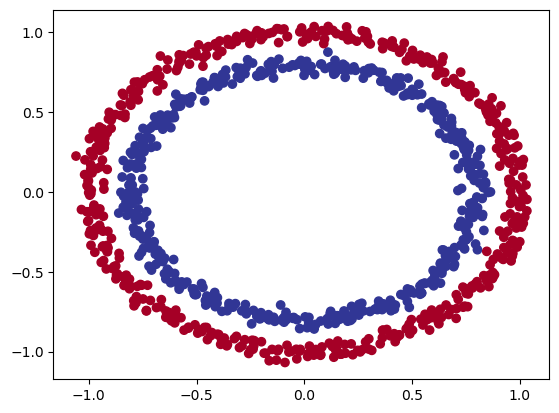

In [8]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [9]:
X = torch.tensor(X).float()
y = torch.tensor(y).float()

In [10]:
print(f"The type of X = {X.type()}")
print(f"The type of X = {X.dtype}")
print(f"The type of y = {y.dtype}")

The type of X = torch.FloatTensor
The type of X = torch.float32
The type of y = torch.float32


In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

In [12]:
print(f"The shape of X_train = {X_train.shape}")
print(f"The shape of y_train = {y_train.shape}")
print(f"The shape of X_test = {X_test.shape}")
print(f"The shape of y_test = {y_test.shape}")


The shape of X_train = torch.Size([800, 2])
The shape of y_train = torch.Size([800])
The shape of X_test = torch.Size([200, 2])
The shape of y_test = torch.Size([200])


In [13]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [14]:
class ClassificationModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5, out_features=1)  
        
    def forward(self, x):
        x =self.layer1(x)
        x =self.layer2(x)
        return x

In [15]:
model0 = ClassificationModelV0().to(device)

In [16]:
model0

ClassificationModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
loss_fn = nn.BCEWithLogitsLoss()    

optimizer = torch.optim.SGD(model0.parameters(), lr=0.01)

In [18]:

def accuracy(y_pred, y_true):
    # Ensure y_pred and y_true are tensors
    y_pred = y_pred.to(torch.int)
    y_true = y_true.to(torch.int)
    
    # Calculate the number of correct predictions
    correct = torch.eq(y_pred, y_true).sum().item()
    
    # Calculate accuracy as a percentage
    acc = (correct / len(y_true)) * 100
    return acc

In [19]:
TRAIN_LOSS = []
TRAIN_ACC = []
TEST_LOSS = []
TEST_ACC = []

In [20]:
X_test = X_test.to(device)
y_test = y_test.to(device)
X_train = X_train.to(device)
y_train = y_train.to(device)


In [21]:
torch.cuda.manual_seed(42)
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):

    model0.train()

    y_logits = model0(X_train).squeeze()

    y_pred = torch.sigmoid(y_logits)

    y_labels = y_pred.round()

    loss = loss_fn(y_logits, y_train)

    accuracy_score = accuracy(y_labels, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model0.eval()

    with torch.inference_mode():

        y_logits_test = model0(X_test).squeeze()

        y_test_pred = torch.sigmoid(y_logits_test)

        y_test_labels = y_test_pred.round()

        test_loss = loss_fn(y_logits_test, y_test)

        test_accuracy = accuracy(y_test_labels, y_test)

    if epoch % 5 == 0:
        print(
            f"Epoch {epoch} : Train Loss = {loss.item()} , Train Accuracy = {accuracy_score} , Test Loss = {test_loss.item()} , Test Accuracy = {test_accuracy}"
        )
        TRAIN_LOSS.append(loss.item())
        TRAIN_ACC.append(accuracy_score)
        TEST_LOSS.append(test_loss.item())
        TEST_ACC.append(test_accuracy)

Epoch 0 : Train Loss = 0.6970438957214355 , Train Accuracy = 47.75 , Test Loss = 0.6920422911643982 , Test Accuracy = 50.0
Epoch 5 : Train Loss = 0.6969894766807556 , Train Accuracy = 47.625 , Test Loss = 0.692016065120697 , Test Accuracy = 50.5
Epoch 10 : Train Loss = 0.6969364881515503 , Train Accuracy = 47.75 , Test Loss = 0.6919910311698914 , Test Accuracy = 50.5
Epoch 15 : Train Loss = 0.6968847513198853 , Train Accuracy = 47.75 , Test Loss = 0.6919671297073364 , Test Accuracy = 51.0
Epoch 20 : Train Loss = 0.6968342661857605 , Train Accuracy = 47.625 , Test Loss = 0.6919443607330322 , Test Accuracy = 51.0
Epoch 25 : Train Loss = 0.6967847943305969 , Train Accuracy = 47.625 , Test Loss = 0.6919226050376892 , Test Accuracy = 51.5
Epoch 30 : Train Loss = 0.6967366337776184 , Train Accuracy = 47.875 , Test Loss = 0.6919019222259521 , Test Accuracy = 51.5
Epoch 35 : Train Loss = 0.6966894865036011 , Train Accuracy = 47.75 , Test Loss = 0.691882312297821 , Test Accuracy = 51.0
Epoch 40

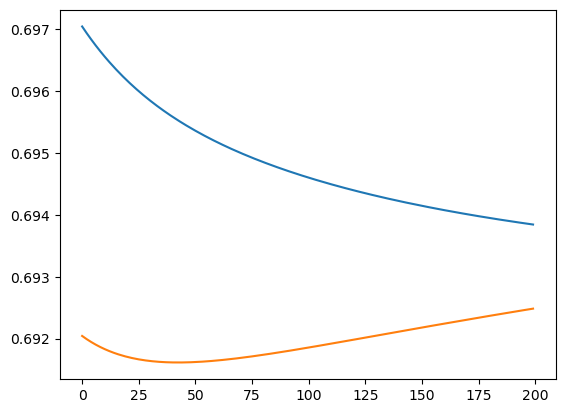

In [22]:
plt.plot(TRAIN_LOSS, label="Train Loss")
plt.plot(TEST_LOSS, label="Test Loss")

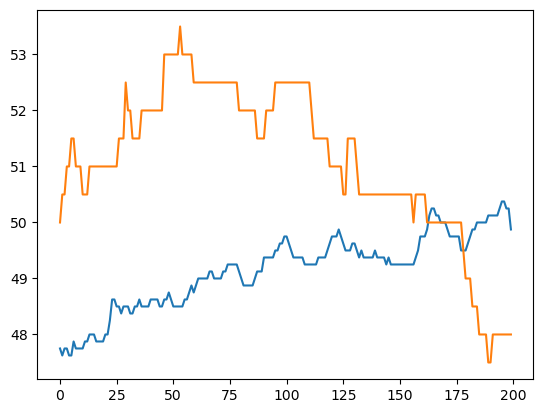

In [23]:
plt.plot(TRAIN_ACC, label="Train Accuracy")
plt.plot(TEST_ACC, label="Test Accuracy")

In [24]:
class ClassificationModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=5)
        self.layer3 = nn.Linear(in_features=5, out_features=1)  
        
    def forward(self, x):
        x =self.layer1(x)
        x =self.layer2(x)
        x =self.layer3(x)
        return x

In [25]:
model1 = ClassificationModelV1().to(device)

model1

ClassificationModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=5, bias=True)
  (layer3): Linear(in_features=5, out_features=1, bias=True)
)

In [26]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model1.parameters(), lr=0.01)

In [27]:
TRAIN_LOSS= []
TRAIN_ACC = []
TEST_LOSS = []
TEST_ACC = []


In [28]:
torch.cuda.manual_seed(42)
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):

    model1.train()

    y_logits = model1(X_train).squeeze()

    y_pred = torch.sigmoid(y_logits)

    y_labels = y_pred.round()

    loss = loss_fn(y_logits, y_train)

    accuracy_score = accuracy(y_labels, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model1.eval()

    with torch.inference_mode():

        y_logits_test = model1(X_test).squeeze()

        y_test_pred = torch.sigmoid(y_logits_test)

        y_test_labels = y_test_pred.round()

        test_loss = loss_fn(y_logits_test, y_test)

        test_accuracy = accuracy(y_test_labels, y_test)

    if epoch % 5 == 0:
        print(
            f"Epoch {epoch} : Train Loss = {loss.item()} , Train Accuracy = {accuracy_score} , Test Loss = {test_loss.item()} , Test Accuracy = {test_accuracy}"
        )
        TRAIN_LOSS.append(loss.item())
        TRAIN_ACC.append(accuracy_score)
        TEST_LOSS.append(test_loss.item())
        TEST_ACC.append(test_accuracy)

Epoch 0 : Train Loss = 0.6952999830245972 , Train Accuracy = 48.625 , Test Loss = 0.6978923082351685 , Test Accuracy = 47.0
Epoch 5 : Train Loss = 0.6952490210533142 , Train Accuracy = 48.75 , Test Loss = 0.6978397965431213 , Test Accuracy = 49.0
Epoch 10 : Train Loss = 0.6951999664306641 , Train Accuracy = 48.75 , Test Loss = 0.6977894306182861 , Test Accuracy = 48.5
Epoch 15 : Train Loss = 0.6951530575752258 , Train Accuracy = 48.5 , Test Loss = 0.697740912437439 , Test Accuracy = 49.0
Epoch 20 : Train Loss = 0.6951078772544861 , Train Accuracy = 48.375 , Test Loss = 0.6976942420005798 , Test Accuracy = 48.5
Epoch 25 : Train Loss = 0.6950645446777344 , Train Accuracy = 48.5 , Test Loss = 0.6976493000984192 , Test Accuracy = 49.0
Epoch 30 : Train Loss = 0.6950228810310364 , Train Accuracy = 48.375 , Test Loss = 0.697606086730957 , Test Accuracy = 49.5
Epoch 35 : Train Loss = 0.6949828863143921 , Train Accuracy = 48.375 , Test Loss = 0.6975643634796143 , Test Accuracy = 50.0
Epoch 40 :

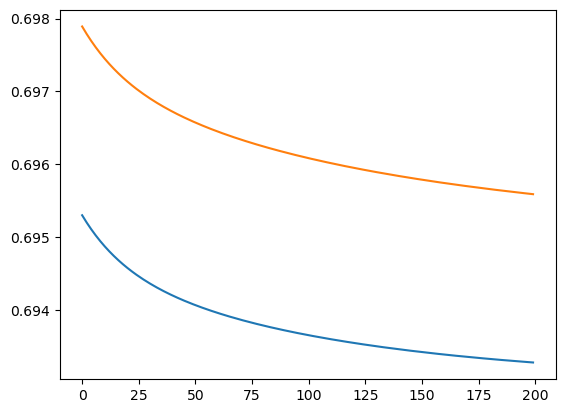

In [29]:
plt.plot(TRAIN_LOSS, label="Train Loss")
plt.plot(TEST_LOSS, label="Test Loss")


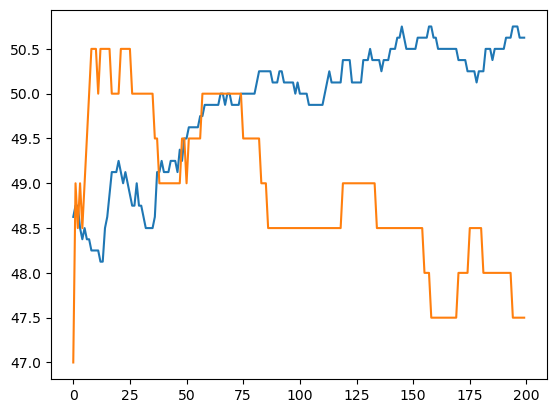

In [30]:
plt.plot(TRAIN_ACC, label="Train Accuracy")
plt.plot(TEST_ACC, label="Test Accuracy")

In [85]:
class ClassificationModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x

In [86]:
model2= ClassificationModelV2().to(device)

In [87]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [88]:
epochs = 1000

TRAIN_LOSS = []
TRAIN_ACC = []
TEST_LOSS = []
TEST_ACC = []


In [91]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model2.parameters(), lr=0.01)

In [102]:
for epoch in range(epochs + 1):
    

    model2.train()

    y_logits = model2(X_train).squeeze()

    y_pred = torch.sigmoid(y_logits)

    y_labels = y_pred.round()

    loss = loss_fn(y_logits, y_train)

    accuracy_score = accuracy(y_labels, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model2.eval()

    with torch.inference_mode():

        y_logits_test = model2(X_test).squeeze()

        y_test_pred = torch.sigmoid(y_logits_test)

        y_test_labels = y_test_pred.round()

        test_loss = loss_fn(y_logits_test, y_test)

        test_accuracy = accuracy(y_test_labels, y_test)
        
    if epoch % 10 == 0:
        
        print(
            f"Epoch {epoch} : Train Loss = {loss.item()} , Train Accuracy = {accuracy_score} , Test Loss = {test_loss.item()} , Test Accuracy = {test_accuracy}"
        )
        TRAIN_LOSS.append(loss.item())
        TRAIN_ACC.append(accuracy_score)
        TEST_LOSS.append(test_loss.item())
        TEST_ACC.append(test_accuracy)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

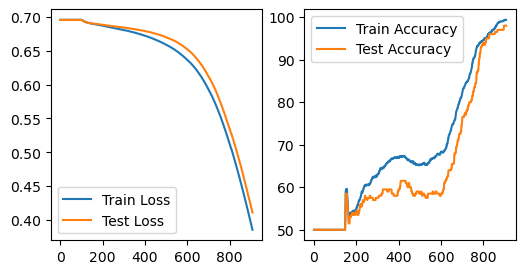

In [101]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.plot(TRAIN_LOSS, label="Train Loss")
plt.plot(TEST_LOSS, label="Test Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(TRAIN_ACC, label="Train Accuracy")
plt.plot(TEST_ACC, label="Test Accuracy")
plt.legend()